In [332]:
import os
import sys

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/src")
from conf.database import db

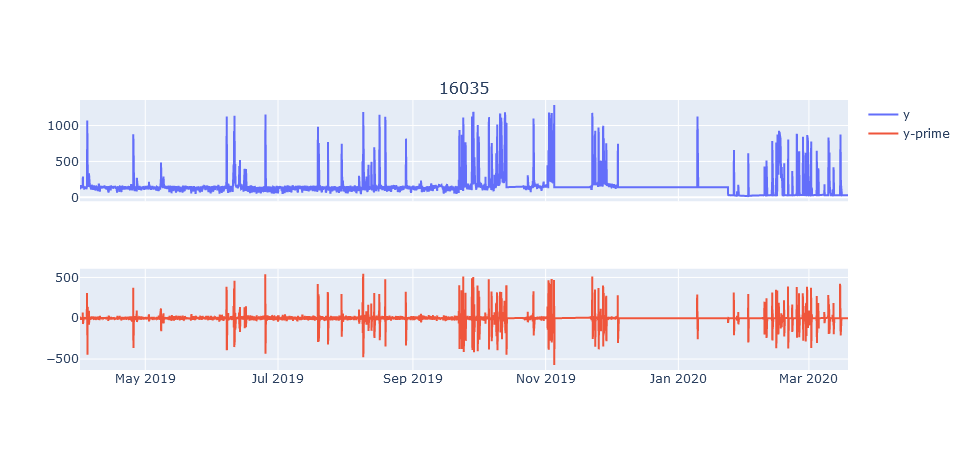

In [333]:
target="16035"
query = {}
project = {"_id": 0, "Datetime": 1, target:1}
df = (
    pd.DataFrame(
        db["WESSEX_E_Numbers_Apr_2019_60Min_Mean"].find(query, project)
    )
    .set_index("Datetime")
    .sort_index()
)
df[f"{target}_prime"] = np.gradient(df[target])
fig = make_subplots(
    subplot_titles=[target],
    rows=2,
    cols=1,
    shared_xaxes=True
)
fig.add_trace(go.Scatter(x=df.index, y=df[target], name='y'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df[f"{target}_prime"], name='y-prime'), row=2, col=1)

fig.show()